In [1]:
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
# view only link to google sheet with data: 
#https://docs.google.com/spreadsheets/d/1KeLJ1xE3IrPIzAMxSNdr42WA2O3LI4NFjf15zlivuWA/edit?usp=sharing

# import the data as a csv file
seven = pd.read_csv("Fusion_breakpoint_coordinates.csv")

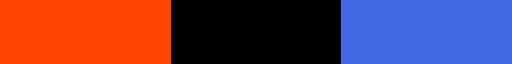

In [3]:
# create the custom discrete colormap
# colors are selected from CSS colors at https://matplotlib.org/stable/gallery/color/named_colors.html
cmap_discrete = (mat.colors.ListedColormap(['orangered', 'black', 'royalblue']))

# visualize the colormap
cmap_discrete

## Scatterplot of TFE3 and Partner Loss/Gain and Breakpoint Loss/Gain

In [4]:
# colors are defined by the breakpoint loss/gain values which are in the "Color" column of the scatter_data
# this function takes a list input of numbers and creates a new list of color names based on the values

def color(scatter_data_list):
    
    colors = []

    for num in scatter_data_list:
        if num <= 2 and num >= -2:
            colors.append("black")
        elif num > 2:
            colors.append("royalblue")
        elif num < -2:
            colors.append("orangered")
    
    return colors

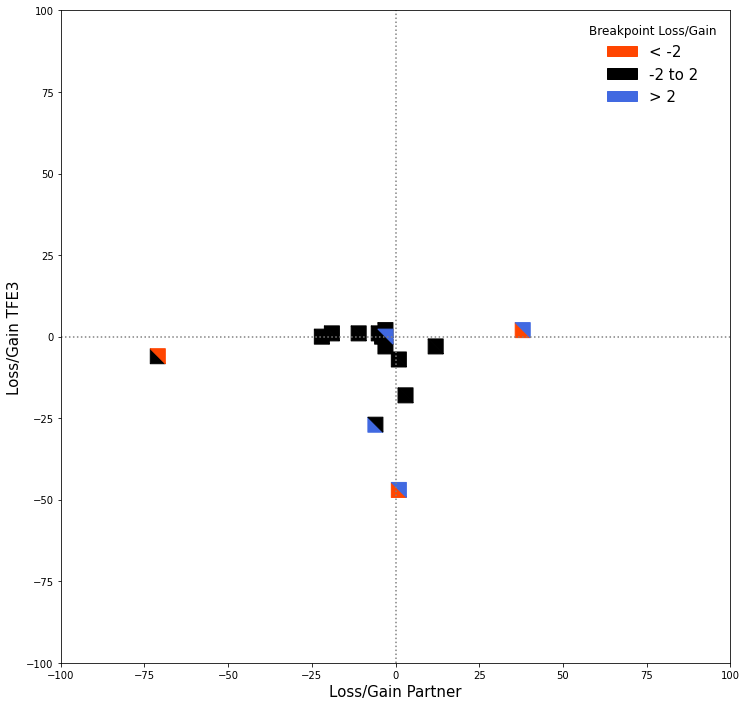

In [5]:
fig, ax = plt.subplots(figsize=(12,12))

colors_b_7 = color(seven["color_b"])
colors_t_7 = color(seven["color_t"])

X = seven["X"]
Y = seven["Y"]

b = mat.markers.MarkerStyle(marker="D", fillstyle = "left")
b._transform = b.get_transform().rotate_deg(45)

ax.scatter(X, Y, 
           s = 15*15, c = colors_b_7, cmap = cmap_discrete, 
           vmin = -2, vmax = 2, marker = b, label = "breakpoint")


t = mat.markers.MarkerStyle(marker="D", fillstyle = "right")
t._transform = t.get_transform().rotate_deg(45)

ax.scatter(X, Y, 
           s = 15*15, c = colors_t_7, cmap = cmap_discrete, 
           vmin = -2, vmax = 2, marker = t, label = "breakpoint")

# add x and y axis labels
ax.set_xlabel("Loss/Gain Partner", fontsize = 15)
ax.set_ylabel("Loss/Gain TFE3", fontsize = 15)

# set x and y axis limits
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

# add x and y lines at 0
ax.hlines(y = 0, xmin = -100, xmax = 100, color = "grey", linestyle = "dotted")
ax.vlines(x = 0, ymin = -100, ymax = 100, color = "grey", linestyle = "dotted")

# add color key
labels = ['< -2', '-2 to 2', '> 2']
color = ['orangered', 'black', 'royalblue']
loss_gain = [mat.patches.Patch(color = color[i]) for i in range(len(color))]

# add legend and format text size
legend = ax.legend(loss_gain, labels, title = "Breakpoint Loss/Gain", 
                   loc = "upper right", fontsize = 15, frameon = False)
legend.get_title().set_fontsize('12')

# use when we want to save the figure 
# can be pdf or png
fig.savefig('heatmap.pdf')

## Bar Plots of Breakpoint Loss/Gain

In [6]:
# make list of breakpoint loss/gain
breakpoint_data = list(seven["color_b"]) + list(seven["color_t"])

# count the number of each unique loss/gain
breakpoint_counts = Counter(breakpoint_data)

# turn count dictionary into a dataframe
count_bars = pd.DataFrame.from_dict(breakpoint_counts, orient = "index", columns = ["count"])
count_bars.reset_index(inplace = True)
count_bars = count_bars.rename(columns = {'index':'loss/gain'})

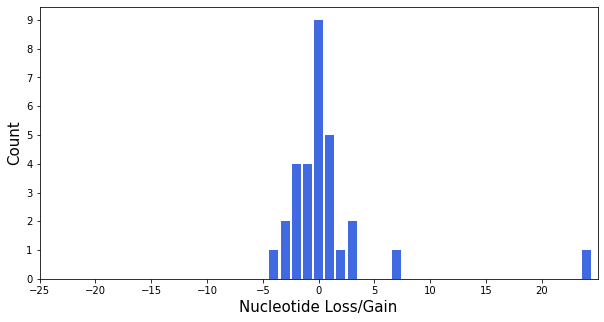

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

# plot the data
ax.bar(count_bars["loss/gain"], height = count_bars["count"], color = "royalblue")

# set x and y axis labels
ax.set_xlabel("Nucleotide Loss/Gain", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)

# set x and y axis tick marks
ax.set_xticks(list(range(-25, 25, 5)))
ax.set_yticks(list(range(0, 10)))

# set the x axis range
ax.set_xlim(-25, 25)
fig.savefig('barplot.pdf')